### import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Loading Data Set

In [2]:
input_file_dir = "C:\\Users\\Dell\\Desktop\\Mihir\\Courses\\DataAnalyst\\projects\\electronic_store_sales_analysis\\Sales_Data\\"

input_data_files = os.listdir(input_file_dir)

all_data_df = pd.DataFrame()
count=0
for curr_file in input_data_files:
    curr_df = pd.read_csv(input_file_dir + curr_file)
    all_data_df = pd.concat([curr_df, all_data_df])
    #print(all_data_df.head())    

In [3]:
print(all_data_df.describe(include=['object']))
print("*"*50)
print(all_data_df.dtypes)

        Order ID               Product Quantity Ordered Price Each   
count     186305                186305           186305     186305  \
unique    178438                    20               10         24   
top     Order ID  USB-C Charging Cable                1      11.95   
freq         355                 21903           168552      21903   

        Order Date  Purchase Address  
count       186305            186305  
unique      142396            140788  
top     Order Date  Purchase Address  
freq           355               355  
**************************************************
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


### Cleaning and Tranforming data

In [4]:
all_data_df['Quantity Ordered'] = pd.to_numeric(all_data_df['Quantity Ordered'], errors='coerce')
all_data_df['Price Each'] = pd.to_numeric(all_data_df['Price Each'], errors='coerce')
all_data_df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [5]:
all_data_df['Order Date'].iloc[1675:1686]

1675    09/16/19 01:32
1676    09/03/19 14:29
1677    09/03/19 14:29
1678    09/03/19 18:27
1679        Order Date
1680    09/27/19 21:36
1681    09/17/19 15:40
1682    09/23/19 08:23
1683    09/08/19 20:34
1684    09/07/19 13:42
1685    09/07/19 11:26
Name: Order Date, dtype: object

In [6]:
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [38]:
#convert date data into date as datatype 
all_data_df['Order Date'] = pd.to_datetime(all_data_df['Order Date'], format='mixed', errors='coerce')

In [8]:
all_data_df['Month'] = all_data_df['Order Date'].dt.month

In [9]:
print(all_data_df.isnull().sum())
print(all_data_df.shape)

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
Month               900
dtype: int64
(186850, 7)


In [10]:
all_data_df1 = all_data_df.dropna()
print(all_data_df1.shape)
print("*"*50)
print(all_data_df1.describe())

(185950, 7)
**************************************************
       Quantity Ordered     Price Each                     Order Date   
count     185950.000000  185950.000000                         185950  \
mean           1.124383     184.399735  2019-07-18 21:54:38.887550464   
min            1.000000       2.990000            2019-01-01 03:07:00   
25%            1.000000      11.950000            2019-04-16 21:05:15   
50%            1.000000      14.950000            2019-07-17 20:40:30   
75%            1.000000     150.000000            2019-10-26 08:14:00   
max            9.000000    1700.000000            2020-01-01 05:13:00   
std            0.442793     332.731330                            NaN   

               Month  
count  185950.000000  
mean        7.059140  
min         1.000000  
25%         4.000000  
50%         7.000000  
75%        10.000000  
max        12.000000  
std         3.502996  


In [11]:
#normalize(): doesn't create data type as object instead give date
all_data_df1['Date'] = all_data_df1['Order Date'].dt.normalize()
all_data_df1.describe()

,Quantity Ordered,Price Each,Order Date,Month,Date
count,185950.000000,185950.000000,185950,185950.000000,185950
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,2019-07-18 07:00:22.109169152
min,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2019-01-01 00:00:00
25%,1.000000,11.950000,2019-04-16 21:05:15,4.000000,2019-04-16 00:00:00
50%,1.000000,14.950000,2019-07-17 20:40:30,7.000000,2019-07-17 00:00:00
75%,1.000000,150.000000,2019-10-26 08:14:00,10.000000,2019-10-26 00:00:00
max,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,2020-01-01 00:00:00
std,0.442793,332.731330,NaN,3.502996,NaN


In [12]:
all_data_df1['Order Value'] = all_data_df1['Quantity Ordered']*all_data_df1['Price Each']
all_data_df1.describe()

,Quantity Ordered,Price Each,Order Date,Month,Date,Order Value
count,185950.000000,185950.000000,185950,185950.000000,185950,185950.000000
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,2019-07-18 07:00:22.109169152,185.490917
min,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2019-01-01 00:00:00,2.990000
25%,1.000000,11.950000,2019-04-16 21:05:15,4.000000,2019-04-16 00:00:00,11.950000
50%,1.000000,14.950000,2019-07-17 20:40:30,7.000000,2019-07-17 00:00:00,14.950000
75%,1.000000,150.000000,2019-10-26 08:14:00,10.000000,2019-10-26 00:00:00,150.000000
max,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,2020-01-01 00:00:00,3400.000000
std,0.442793,332.731330,NaN,3.502996,NaN,332.919771


In [13]:
all_data_df1.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Order Value
18378,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4.0,2019-04-08,600.00
18379,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4.0,2019-04-15,3.84
18380,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4.0,2019-04-28,5.98
18381,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4.0,2019-04-14,3.84
18382,194094,Lightning Charging Cable,1.0,14.95,2019-04-18 11:08:00,"354 North St, Boston, MA 02215",4.0,2019-04-18,14.95


### Analysis and Visualization

In [14]:
month_wise_order_value_df = all_data_df1[['Month', 'Order Value']].groupby('Month').sum().sort_values(by=['Order Value'], ascending=False).reset_index()
month_wise_order_value_df

,Month,Order Value
0,12.0,4613443.34
1,10.0,3736726.88
2,4.0,3390670.24
3,11.0,3199603.20
4,5.0,3152606.75
5,3.0,2807100.38
6,7.0,2647775.76
7,6.0,2577802.26
8,8.0,2244467.88
9,2.0,2202022.42


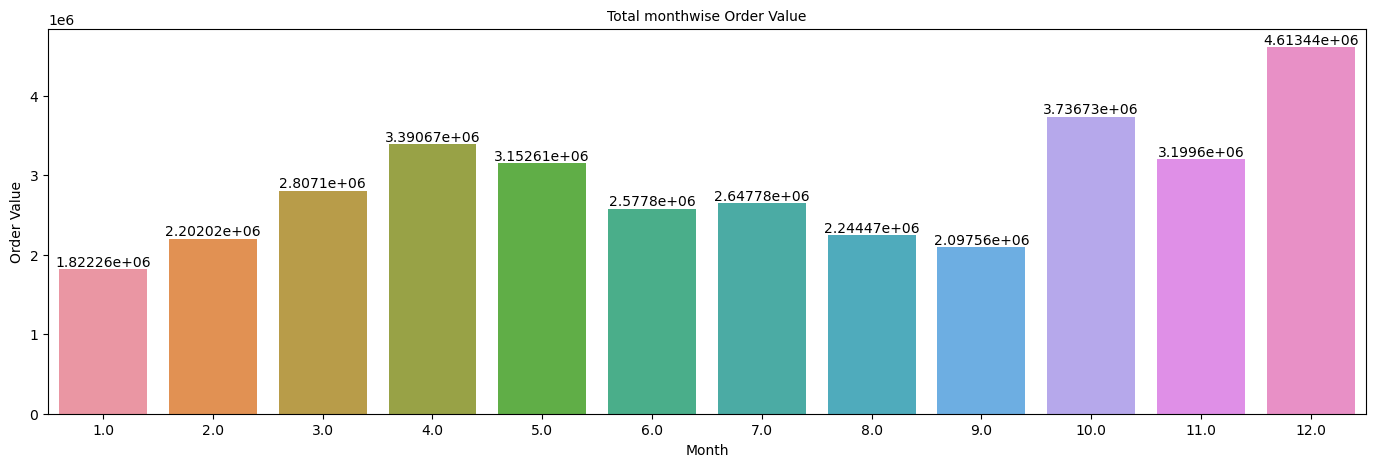

In [15]:
plt.figure(figsize=(17,5))
plt.xlabel('Month')
plt.ylabel('Order Value')
plt.title('Total monthwise Order Value', size=10)

category_plot = sns.barplot(data=month_wise_order_value_df, x='Month', y='Order Value')
for bar in category_plot.containers:
    category_plot.bar_label(bar)
#plt.show()

In [16]:
month_wise_order_value_df['Order Value'][[11]]

11    1822256.73
Name: Order Value, dtype: float64

#### which city has the highest number of sales

In [17]:
all_data_df1[['street', 'city', 'pincode']]=all_data_df1['Purchase Address'].str.split(',', expand=True)
all_data_df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Order Value,street,city,pincode
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9.0,2019-09-17,15.36,380 North St,Los Angeles,CA 90001
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9.0,2019-09-29,23.90,511 8th St,Austin,TX 73301
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9.0,2019-09-16,11.95,151 Johnson St,Los Angeles,CA 90001
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9.0,2019-09-27,149.99,355 Hickory St,Seattle,WA 98101
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9.0,2019-09-01,11.95,125 5th St,Atlanta,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4.0,2019-04-08,600.00,177 Jackson St,Los Angeles,CA 90001
18379,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4.0,2019-04-15,3.84,311 Forest St,Austin,TX 73301
18380,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4.0,2019-04-28,5.98,347 Sunset St,San Francisco,CA 94016
18381,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4.0,2019-04-14,3.84,835 Lake St,Portland,OR 97035


In [18]:
city_wise_order_value_df = all_data_df1[['city', 'Order Value']].groupby('city').sum().sort_values(by=['Order Value'], ascending=False).reset_index()
city_wise_order_value_df

,city,Order Value
0,San Francisco,8262203.91
1,Los Angeles,5452570.80
2,New York City,4664317.43
3,Boston,3661642.01
4,Atlanta,2795498.58
5,Dallas,2767975.40
6,Seattle,2747755.48
7,Portland,2320490.61
8,Austin,1819581.75


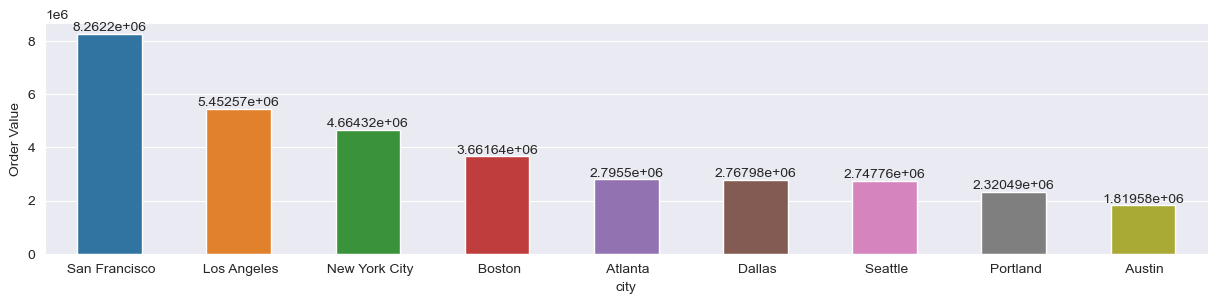

In [40]:
plt.figure(figsize=(15,3))
city_plot = sns.barplot(x=city_wise_order_value_df['city'], y=city_wise_order_value_df['Order Value'], width=0.5)

for bar_value in city_plot.containers:
    city_plot.bar_label(bar_value)

## Highest number of sale came from San Francisco, Los Angeles and New York City.

### Best time to display advertisement?

In [20]:
all_data_df1['time'] = all_data_df1['Order Date'].dt.time

In [21]:
all_data_df1['hour'] = all_data_df1['Order Date'].dt.hour
hour_wise_order_value_df = all_data_df1[['hour', 'Order Value']].groupby('hour').sum().sort_values(by=['Order Value'], ascending=False).reset_index()
hour_wise_order_value_df.head()

,hour,Order Value
0,19,2412938.54
1,12,2316821.34
2,11,2300610.24
3,20,2281716.24
4,18,2219348.30


In [22]:
hour_wise_order_value_df.head(10)

,hour,Order Value
0,19,2412938.54
1,12,2316821.34
2,11,2300610.24
3,20,2281716.24
4,18,2219348.30
5,13,2155389.80
6,17,2129361.61
7,14,2083672.73
8,21,2042000.86
9,10,1944286.77


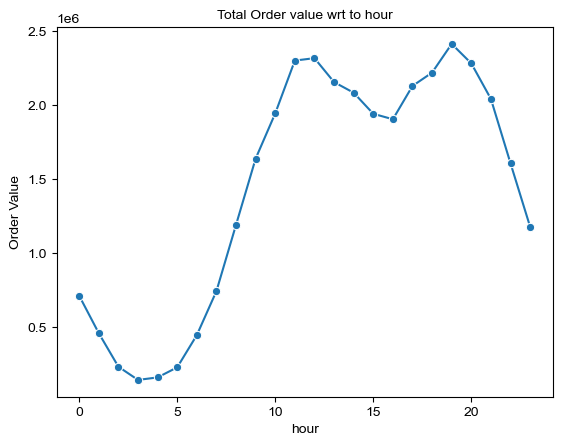

In [23]:
plt.title('Total Order value wrt to hour', size=10)
sns.set_style("darkgrid")
sns.lineplot(x='hour', y='Order Value', data=hour_wise_order_value_df, dashes=True, marker="o")
plt.show()

## Around 11am and 7pm is good to start advertising campaign to increase sales.

Most often what products are sold together?

In [24]:
all_data_df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Order Value,street,city,pincode,time,hour
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9.0,2019-09-17,15.36,380 North St,Los Angeles,CA 90001,14:44:00,14
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9.0,2019-09-29,23.90,511 8th St,Austin,TX 73301,10:19:00,10
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9.0,2019-09-16,11.95,151 Johnson St,Los Angeles,CA 90001,17:48:00,17
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9.0,2019-09-27,149.99,355 Hickory St,Seattle,WA 98101,07:52:00,7
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9.0,2019-09-01,11.95,125 5th St,Atlanta,GA 30301,19:03:00,19


In [25]:
#filer order id having minimum two product
all_order_df = pd.DataFrame(all_data_df1['Order ID'].value_counts())
all_order_df.reset_index(inplace=True)
all_order_df=all_order_df[all_order_df.apply(lambda x: x['count']>1, axis=1)]
all_order_df.tail()

,Order ID,count
7131,176060,2
7132,168282,2
7133,252282,2
7134,225982,2
7135,141939,2


In [26]:
print(all_data_df1['Product'].value_counts())
print(all_data_df1['Product'].unique())

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64
['AA Batteries (4-pack)' 'USB-C Charging Cable' '27in FHD Monitor'
 '34in Ultrawide Monitor' 'Lightning Charging Cable' 'Vareebadd Phone'
 'Wired Headphones' 'AAA Batteries (4-pack)' 'Apple Airpods Headphones'
 'Google Phone' '20in Monitor' 'Bose SoundSport Headphones' 'iPhone'
 'T

In [27]:
matrix_column_list = ['AA Batteries (4-pack)', 'USB-C Charging Cable', '27in FHD Monitor', '34in Ultrawide Monitor',
                      'Lightning Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'AAA Batteries (4-pack)',
                      'Apple Airpods Headphones', 'Google Phone', '20in Monitor', 'Bose SoundSport Headphones', 'iPhone',
                      'ThinkPad Laptop', 'Macbook Pro Laptop', 'Flatscreen TV', '27in 4K Gaming Monitor',
                      'LG Dryer', 'LG Washing Machine']
product_matrix_df = pd.DataFrame(0,columns=matrix_column_list, index=matrix_column_list)

In [28]:
product_dict = {}

for current_order_id in all_order_df['Order ID']:
    
    current_product_df = all_data_df1[all_data_df1['Order ID']==current_order_id][['Product']]    
    #col:product_1, row:product_2
    for product_1 in current_product_df['Product']:        
        for product_2 in current_product_df['Product']:
            #print(product_1 + ':' + product_2)
            product_matrix_df.at[product_1,product_2] = product_matrix_df.at[product_1,product_2] + 1


In [29]:
corr = product_matrix_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,AA Batteries (4-pack),USB-C Charging Cable,27in FHD Monitor,34in Ultrawide Monitor,Lightning Charging Cable,Vareebadd Phone,Wired Headphones,AAA Batteries (4-pack),Apple Airpods Headphones,Google Phone,20in Monitor,Bose SoundSport Headphones,iPhone,ThinkPad Laptop,Macbook Pro Laptop,Flatscreen TV,27in 4K Gaming Monitor,LG Dryer,LG Washing Machine
AA Batteries (4-pack),1.000000,-0.028603,-0.005277,0.042204,0.038285,-0.073188,-0.000436,0.083289,0.019370,-0.061374,-0.002340,-0.009924,-0.031872,-0.009596,-0.024492,0.011897,0.009579,0.115648,-0.093038
USB-C Charging Cable,-0.028603,1.000000,-0.001949,-0.048548,-0.075987,0.525922,0.133293,-0.006023,-0.079533,0.773504,0.002913,0.111372,-0.120472,-0.039575,-0.048342,-0.065054,-0.062728,-0.120650,-0.160924
27in FHD Monitor,-0.005277,-0.001949,1.000000,-0.053127,-0.026248,-0.077118,-0.075920,0.068825,-0.047181,-0.056296,-0.072744,-0.026638,-0.095865,-0.071549,-0.056199,-0.076310,-0.068596,-0.003113,-0.098050
34in Ultrawide Monitor,0.042204,-0.048548,-0.053127,1.000000,0.005311,-0.081599,-0.027209,0.002892,-0.064791,-0.080056,-0.104091,-0.060727,-0.038410,-0.093468,-0.072224,-0.053548,-0.081062,-0.137349,-0.094546
Lightning Charging Cable,0.038285,-0.075987,-0.026248,0.005311,1.000000,-0.125363,0.086277,-0.010381,0.175774,-0.108308,0.015949,-0.049395,0.782895,-0.026881,-0.038161,-0.010854,-0.000604,-0.050938,0.075706
Vareebadd Phone,-0.073188,0.525922,-0.077118,-0.081599,-0.125363,1.000000,0.178145,-0.077372,-0.102648,0.192175,-0.069891,0.104836,-0.112659,-0.086735,-0.106354,-0.098308,-0.094979,-0.127381,-0.161507
Wired Headphones,-0.000436,0.133293,-0.075920,-0.027209,0.086277,0.178145,1.000000,-0.003120,0.071122,0.330159,-0.027925,0.019673,0.326714,-0.070023,-0.049679,-0.089472,-0.029073,-0.134321,-0.012834
AAA Batteries (4-pack),0.083289,-0.006023,0.068825,0.002892,-0.010381,-0.077372,-0.003120,1.000000,0.034288,-0.057005,-0.040685,-0.010125,-0.052085,0.058404,-0.018235,0.009931,0.027048,-0.048082,0.012137
Apple Airpods Headphones,0.019370,-0.079533,-0.047181,-0.064791,0.175774,-0.102648,0.071122,0.034288,1.000000,-0.101273,-0.049472,-0.055795,0.410688,-0.036150,-0.033880,-0.053405,-0.032407,-0.039074,-0.091957
Google Phone,-0.061374,0.773504,-0.056296,-0.080056,-0.108308,0.192175,0.330159,-0.057005,-0.101273,1.000000,-0.042962,0.263955,-0.111254,-0.071162,-0.068079,-0.095017,-0.083694,-0.128535,-0.123355


In [30]:
product_matrix_df

,AA Batteries (4-pack),USB-C Charging Cable,27in FHD Monitor,34in Ultrawide Monitor,Lightning Charging Cable,Vareebadd Phone,Wired Headphones,AAA Batteries (4-pack),Apple Airpods Headphones,Google Phone,20in Monitor,Bose SoundSport Headphones,iPhone,ThinkPad Laptop,Macbook Pro Laptop,Flatscreen TV,27in 4K Gaming Monitor,LG Dryer,LG Washing Machine
AA Batteries (4-pack),838,75,26,32,106,12,83,87,70,25,16,55,32,17,17,21,26,6,1
USB-C Charging Cable,75,2207,43,26,100,368,205,95,63,999,25,102,29,20,21,17,23,1,0
27in FHD Monitor,26,43,312,10,36,2,22,43,24,8,5,26,2,6,9,6,8,3,1
34in Ultrawide Monitor,32,26,10,260,33,4,28,25,14,5,2,17,13,4,7,8,6,0,1
Lightning Charging Cable,106,100,36,33,1935,4,129,80,116,28,26,72,1015,20,21,22,34,3,6
Vareebadd Phone,12,368,2,4,4,601,149,6,12,5,0,82,7,3,0,3,3,1,0
Wired Headphones,83,205,22,28,129,149,1744,86,100,423,19,74,462,14,20,11,29,1,4
AAA Batteries (4-pack),87,95,43,25,80,6,86,911,81,22,11,57,31,27,18,21,30,2,4
Apple Airpods Headphones,70,63,24,14,116,12,100,81,1022,21,13,50,373,16,19,13,22,3,1
Google Phone,25,999,8,5,28,5,423,22,21,1645,4,228,9,6,7,4,6,1,1


## Form above chart data, we can clearly see that below products sold most together:
iphone:Lightning Charging Cable ||  
Google Phone:USB-C Charging Cable || 
iphone:Apple Airpods Headphones 

What product sold the most?

In [31]:
product_wise_sales_df = all_data_df1[['Product','Quantity Ordered']].groupby('Product').sum().sort_values(by=['Quantity Ordered']).reset_index()
product_wise_sales_df

,Product,Quantity Ordered
0,LG Dryer,646.0
1,LG Washing Machine,666.0
2,Vareebadd Phone,2068.0
3,20in Monitor,4129.0
4,ThinkPad Laptop,4130.0
5,Macbook Pro Laptop,4728.0
6,Flatscreen TV,4819.0
7,Google Phone,5532.0
8,34in Ultrawide Monitor,6199.0
9,27in 4K Gaming Monitor,6244.0


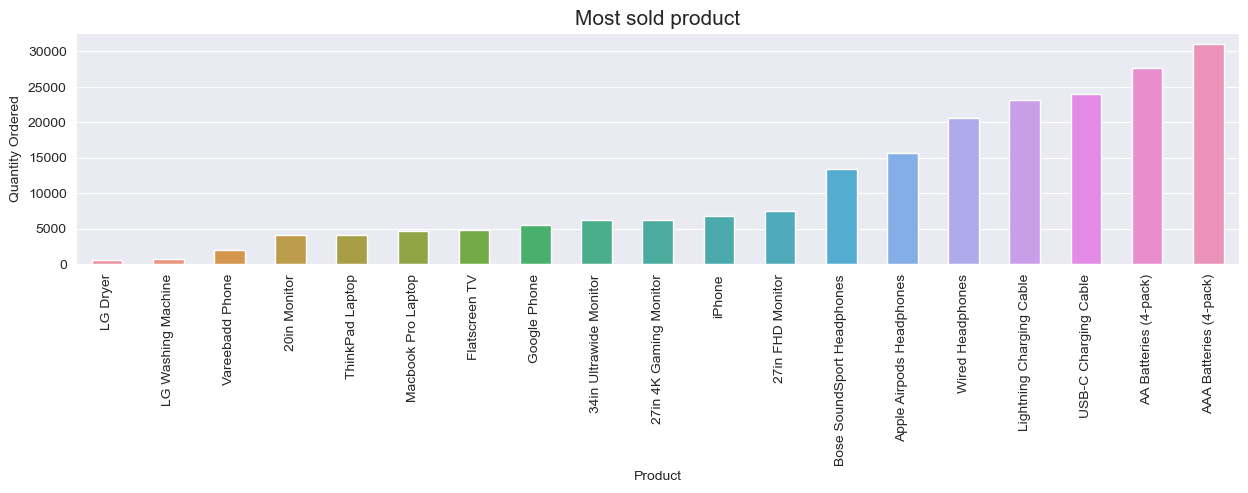

In [32]:
plt.figure(figsize=(15,3))
#product_wise_sales_df.sort_values(by=['Price Each'], ascending=False, inplace=True)
product_wise_bar_plot = sns.barplot(data=product_wise_sales_df, x='Product', y='Quantity Ordered',  width=0.5)
plt.xticks(rotation=90)
plt.title("Most sold product", size=15)

plt.show()
for bar in product_wise_bar_plot.containers:
    product_wise_bar_plot.bar_label(bar)
    

In [33]:
product_wise_df = all_data_df1[['Product','Price Each']].sort_values(by=['Price Each'])
product_wise_df

,Product,Price Each
9104,AAA Batteries (4-pack),2.99
13306,AAA Batteries (4-pack),2.99
13320,AAA Batteries (4-pack),2.99
10352,AAA Batteries (4-pack),2.99
10351,AAA Batteries (4-pack),2.99
...,...,...
6915,Macbook Pro Laptop,1700.00
3459,Macbook Pro Laptop,1700.00
5548,Macbook Pro Laptop,1700.00
3525,Macbook Pro Laptop,1700.00


In [34]:
product_mean_price = product_wise_df.groupby('Product').mean().reset_index().sort_values(by=['Product']).reset_index()
product_mean_price

,index,Product,Price Each
0,0,20in Monitor,109.99
1,1,27in 4K Gaming Monitor,389.99
2,2,27in FHD Monitor,149.99
3,3,34in Ultrawide Monitor,379.99
4,4,AA Batteries (4-pack),3.84
5,5,AAA Batteries (4-pack),2.99
6,6,Apple Airpods Headphones,150.00
7,7,Bose SoundSport Headphones,99.99
8,8,Flatscreen TV,300.00
9,9,Google Phone,600.00


In [35]:
product_wise_sales_df = product_wise_sales_df.sort_values(by=['Product']).reset_index()
product_wise_sales_df
#sns.lineplot(data=product_mean_price, )

,index,Product,Quantity Ordered
0,3,20in Monitor,4129.0
1,9,27in 4K Gaming Monitor,6244.0
2,11,27in FHD Monitor,7550.0
3,8,34in Ultrawide Monitor,6199.0
4,17,AA Batteries (4-pack),27635.0
5,18,AAA Batteries (4-pack),31017.0
6,13,Apple Airpods Headphones,15661.0
7,12,Bose SoundSport Headphones,13457.0
8,6,Flatscreen TV,4819.0
9,7,Google Phone,5532.0


In [36]:
merge_df = pd.merge(product_wise_sales_df[['Product','Quantity Ordered']],product_mean_price[['Product', 'Price Each']], on=['Product'])
merge_df.sort_values(by=['Price Each'], ascending=True, inplace=True)
merge_df

,Product,Quantity Ordered,Price Each
5,AAA Batteries (4-pack),31017.0,2.99
4,AA Batteries (4-pack),27635.0,3.84
15,USB-C Charging Cable,23975.0,11.95
17,Wired Headphones,20557.0,11.99
12,Lightning Charging Cable,23217.0,14.95
7,Bose SoundSport Headphones,13457.0,99.99
0,20in Monitor,4129.0,109.99
2,27in FHD Monitor,7550.0,149.99
6,Apple Airpods Headphones,15661.0,150.00
8,Flatscreen TV,4819.0,300.00


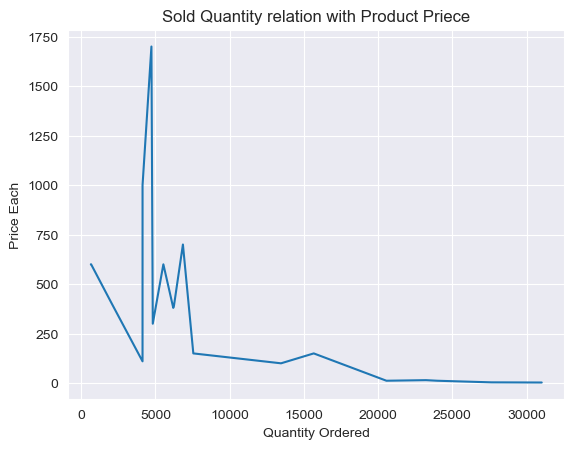

In [41]:
sns.lineplot(data=merge_df, x='Quantity Ordered', y='Price Each')
plt.title('Sold Quantity relation with Product Priece', size=12)
plt.show()

## Above chart clearly stats that we can expect higher order quantity if product price is low.